In [89]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [90]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random, datetime, os, shutil, math

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import keras.utils as image
from keras.utils import load_img, img_to_array
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing import image


In [91]:
# WARNING: this code is used to import dataset from kaggle 
#import os
#os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [92]:
#WARNING: this code is used while importing dataset from kaggle 
#changing the working directory
#%cd /content/gdrive/My Drive/Kaggle

In [93]:
#WARNING: this code is used while importing dataset from kaggle 
#changing the working directory
#!kaggle datasets download -d lantian773030/pokemonclassification

In [94]:
# check content in my directory 
!ls

kaggle.json  pokemonclassification.zip	PokemonData


In [95]:
#WARNING: this code is used while importing dataset from kaggle 
#unzipping the zip files and deleting the zip files
#!unzip \*.zip 

In [96]:
#creating test dataset from the train dataset
#dir_path='/content/gdrive/MyDrive/Kaggle/PokemonData'
#classes = os.listdir(dir_path)

In [97]:
#for creating a train folder
#os.system("mkdir /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_train")

In [98]:
#moving all folders from root folder to train folder
#os.system("mv /content/gdrive/MyDrive/Kaggle/PokemonData/* /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_train/")

In [99]:
# Creating the test folder
#os.system("mkdir /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_test")

In [100]:
#copying all train data to test folder, in order to get same folder structure
#os.system("cp -r /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_train/* /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_test/")

In [101]:
#deleting images from sub directories of test folder
#os.system("find /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_test/ -name '*.*' -type f -delete")

In [102]:
#train_dir='/content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_train'
#test_dir='/content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_test'

In [103]:
# Copying 15 random images from train folders to test folders
def prep_test_data(pokemon, train_dir, test_dir):
  pop = os.listdir(train_dir+'/'+pokemon)
  test_data=random.sample(pop, 15)
  print(test_data)
  for f in test_data:
    shutil.copy(train_dir+'/'+pokemon+'/'+f, test_dir+'/'+pokemon+'/')

In [104]:
#performing samething for each folder in train folder
#for poke in os.listdir(train_dir):
#  prep_test_data(poke, train_dir, test_dir)

In [105]:
target_classes = os.listdir(train_dir)
num_classes = len(target_classes)
print('Number of target classes:', num_classes)
print(list(enumerate(target_classes)))

Number of target classes: 135
[(0, 'Abra'), (1, 'Aerodactyl'), (2, 'Alakazam'), (3, 'Alolan Sandslash'), (4, 'Arbok'), (5, 'Arcanine'), (6, 'Articuno'), (7, 'Beedrill'), (8, 'Bellsprout'), (9, 'Blastoise'), (10, 'Bulbasaur'), (11, 'Butterfree'), (12, 'Caterpie'), (13, 'Chansey'), (14, 'Charizard'), (15, 'Charmander'), (16, 'Charmeleon'), (17, 'Clefable'), (18, 'Clefairy'), (19, 'Cloyster'), (20, 'Cubone'), (21, 'Dewgong'), (22, 'Diglett'), (23, 'Ditto'), (24, 'Dodrio'), (25, 'Doduo'), (26, 'Dragonair'), (27, 'Dragonite'), (28, 'Dratini'), (29, 'Drowzee'), (30, 'Dugtrio'), (31, 'Eevee'), (32, 'Ekans'), (33, 'Electabuzz'), (34, 'Electrode'), (35, 'Exeggcute'), (36, 'Exeggutor'), (37, 'Farfetchd'), (38, 'Fearow'), (39, 'Flareon'), (40, 'Gastly'), (41, 'Gengar'), (42, 'Geodude'), (43, 'Gloom'), (44, 'Golbat'), (45, 'Goldeen'), (46, 'Golduck'), (47, 'Golem'), (48, 'Graveler'), (49, 'Grimer'), (50, 'Growlithe'), (51, 'Gyarados'), (52, 'Haunter'), (53, 'Hitmonchan'), (54, 'Hitmonlee'), (55, '

In [106]:
training_set_distribution = [len(os.listdir(os.path.join(train_dir, dir))) for dir in os.listdir(train_dir)]
testing_set_distribution = [len(os.listdir(os.path.join(test_dir, dir))) for dir in os.listdir(test_dir)]

In [107]:
def show_pokemon(pokemon):
  num = len(pokemon)
  if num == 0:
    return None
  rows = int(math.sqrt(num))
  cols = (num+1)//rows
  f, axs = plt.subplots(rows, cols)
  fig = 0
  for b in pokemon:
    img = load_img(b)
    row = fig // cols
    col = fig % cols
    axs[row, col].imshow(img)
    fig += 1
  plt.show()

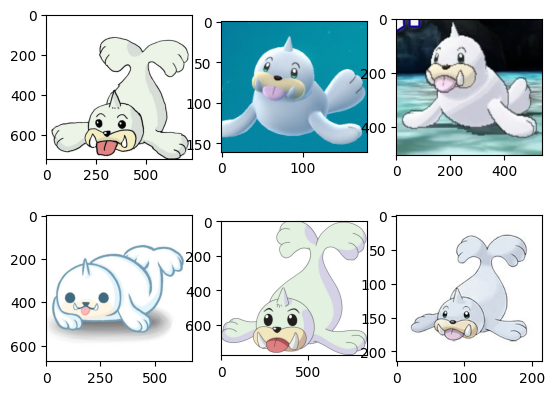

In [108]:
dir_name = os.path.join(train_dir,"Seel")
all_images = [os.path.join(dir_name, fname) for fname in os.listdir(dir_name)]
show_pokemon(all_images[:6])

In [109]:
image_size = (64, 64, 3)
datagen=ImageDataGenerator(rescale = 1./255,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           )

In [110]:
training_set=datagen.flow_from_directory(train_dir,
                                         target_size=image_size[:2],
                                         batch_size=32,
                                         class_mode='categorical',
                                         color_mode='rgb'
                                         )

Found 6132 images belonging to 135 classes.


In [111]:
validation_set=datagen.flow_from_directory(test_dir,
                                           target_size=image_size[:2],
                                           batch_size=32,
                                           class_mode='categorical',
                                           color_mode='rgb'
                                           )

Found 2796 images belonging to 150 classes.


In [112]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras import applications
from keras.utils import plot_model

In [113]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)
filepath = "model.h5"
ckpt = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
rlp = ReduceLROnPlateau(monitor='loss', patience=3, verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        4864      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 135)              

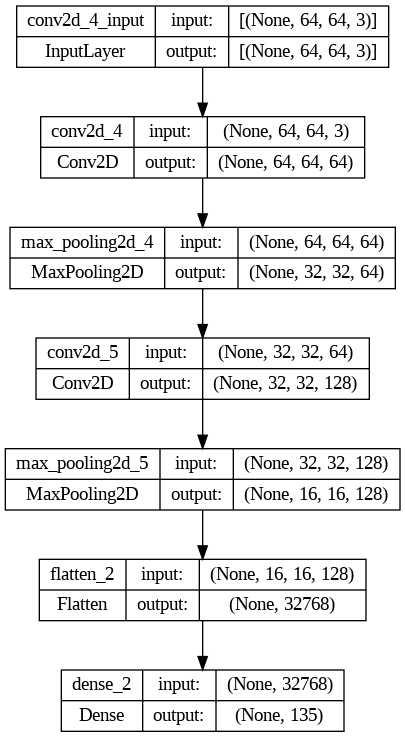

In [114]:
#defining model
def cnn(image_size, num_classes):
    classifier = Sequential()
    classifier.add(Conv2D(64, (5, 5), input_shape=image_size, activation='relu', padding='same'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Flatten())
    classifier.add(Dense(num_classes, activation = 'softmax'))
    classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    return classifier

cnn_model = cnn(image_size, num_classes)
cnn_model.summary()
plot_model(cnn_model, show_shapes=True) # just learned this nice new thing

In [119]:
history = cnn_model.fit(
    x = training_set, validation_data = validation_set,
    callbacks=[es, ckpt, rlp], epochs = 20, 
)

Epoch 1/20
192/192 [==============================] - ETA: 0s - loss: 1.5573 - acc: 0.6119

InvalidArgumentError: ignored

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
pd.DataFrame(history.history).iloc[:, :-1].plot(ax=ax)